# 1) Library initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk

#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 


from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 2) Loading Data

In [4]:
raw_data = pd.read_csv('/content/amazon_co-ecommerce_sample.csv')
raw_data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,...,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894,Unnamed: 895,Unnamed: 896,Unnamed: 897
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.00,1.00,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.00,1.00,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.00,2.00,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.00,2.00,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.00,2.00,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. product_name: The name of the product. (String)
2. manufacturer: The manufacturer of the product. (String)
3. price: The price of the product. (Float)
4. number available in_stock: The number of the product available in stock. (Integer)
5. number of review: The number of reviews for the product. (Integer)
6. number of answered_questions: The number of questions answered for the product. (Integer)
7. averagereviewrating: The average review rating for the product. (Float)
8. amazoncategoryandsubcategory: The Amazon category and subcategory for the product. (String)
9. customers who bought this item also bought: The customers who bought this item also bought. (String)
10. description: The description of the product. (String)
11. product_information: The product information. (String)
12. product_description: The product description. (String)
13. items customers buy after viewing this item: The items customers buy after viewing this item. (String)
14. customer questions_and_answers: The customer questions and answers. (String)
15. customer_reviews: The customer reviews. (String)
16. sellers: The sellers. (String)

# 3) Data Information

In [5]:
raw_data.shape

(10002, 898)

In [6]:
raw_data.dtypes

uniq_id                      object
product_name                 object
manufacturer                 object
price                        object
number_available_in_stock    object
                              ...  
Unnamed: 893                 object
Unnamed: 894                 object
Unnamed: 895                 object
Unnamed: 896                 object
Unnamed: 897                 object
Length: 898, dtype: object

In [7]:
raw_data.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought',
       ...
       'Unnamed: 888', 'Unnamed: 889', 'Unnamed: 890', 'Unnamed: 891',
       'Unnamed: 892', 'Unnamed: 893', 'Unnamed: 894', 'Unnamed: 895',
       'Unnamed: 896', 'Unnamed: 897'],
      dtype='object', length=898)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Columns: 898 entries, uniq_id to Unnamed: 897
dtypes: object(898)
memory usage: 68.5+ MB


# 4) Data Cleaning

##4.1) Columns with Unnamed prefix are removed as they are containing all null values

In [9]:
clean_data = raw_data[raw_data.columns.drop(list(raw_data.filter(regex='Unnamed')))]

In [10]:
clean_data.head(3)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.00,1.00,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.00,1.00,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.00,2.00,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."


In [11]:
clean_data.columns


Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [12]:
clean_data.shape

(10002, 17)

In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   uniq_id                                      10002 non-null  object
 1   product_name                                 10002 non-null  object
 2   manufacturer                                 9995 non-null   object
 3   price                                        8567 non-null   object
 4   number_available_in_stock                    7502 non-null   object
 5   number_of_reviews                            9984 non-null   object
 6   number_of_answered_questions                 9237 non-null   object
 7   average_review_rating                        9984 non-null   object
 8   amazon_category_and_sub_category             9312 non-null   object
 9   customers_who_bought_this_item_also_bought   8940 non-null   object
 10  descriptio

In [14]:
clean_data = clean_data.drop_duplicates(subset=['uniq_id'])


Handling with Null Values

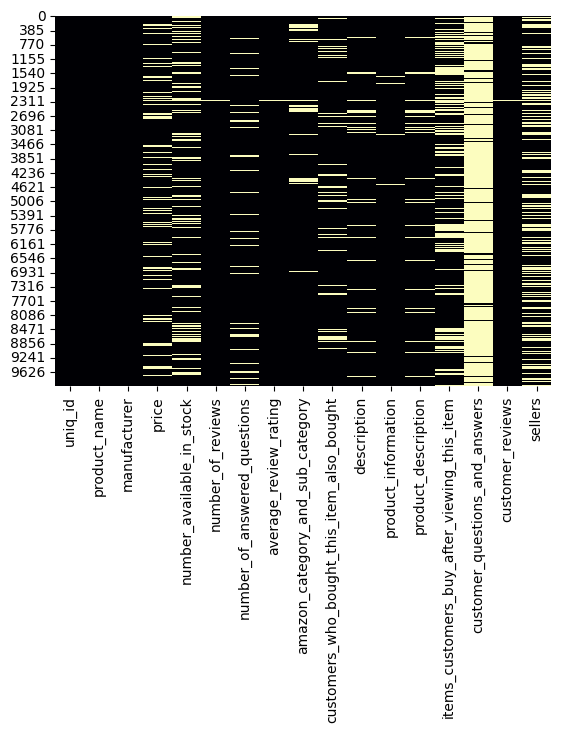

In [15]:
sns.heatmap(clean_data.isnull(),cmap = 'magma',cbar = False);

In [16]:
print(" \nCount total NaN in a DataFrame : \n\n",
       clean_data.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 23115


In [17]:
clean_data.isna().mean().round(4) * 100

uniq_id                                        0.00
product_name                                   0.00
manufacturer                                   0.07
price                                         14.35
number_available_in_stock                     25.00
number_of_reviews                              0.18
number_of_answered_questions                   7.65
average_review_rating                          0.18
amazon_category_and_sub_category               6.90
customers_who_bought_this_item_also_bought    10.62
description                                    6.51
product_information                            0.59
product_description                            6.52
items_customers_buy_after_viewing_this_item   30.66
customer_questions_and_answers                90.86
customer_reviews                               0.22
sellers                                       30.83
dtype: float64

## 4.2) Converting features to respective datatype

###4.2.1) Average Review Rating Feature

Things done 

1) removed stop words 

2) removed uneessary category

3) Converted to float datatype



In [18]:
clean_data = clean_data.dropna(subset=['average_review_rating'])

In [19]:
#clean_data = clean_data.dropna()

Analysis of 'Average review rating' column and removed stopwords

In [20]:
clean_data['average_review_rating']

0        4.9 out of 5 stars
1        4.5 out of 5 stars
2        3.9 out of 5 stars
3        5.0 out of 5 stars
4        4.7 out of 5 stars
                ...        
9997     5.0 out of 5 stars
9998     4.0 out of 5 stars
9999     5.0 out of 5 stars
10000    5.0 out of 5 stars
10001    4.5 out of 5 stars
Name: average_review_rating, Length: 9983, dtype: object

In [21]:
clean_data['average_review_rating'].value_counts(ascending=False)

5.0 out of 5 stars                  5140
4.0 out of 5 stars                  1312
4.5 out of 5 stars                   718
4.8 out of 5 stars                   567
4.7 out of 5 stars                   528
4.3 out of 5 stars                   407
4.6 out of 5 stars                   392
4.4 out of 5 stars                   298
4.9 out of 5 stars                   237
4.2 out of 5 stars                   217
4.1 out of 5 stars                   145
3.9 out of 5 stars                     7
3.0 out of 5 stars                     3
3.6 out of 5 stars                     3
3.5 out of 5 stars                     2
3.3 out of 5 stars                     2
3.7 out of 5 stars                     2
{""text"":""Amazon Cloud Drive""       1
3.8 out of 5 stars                     1
2.3 out of 5 stars                     1
Name: average_review_rating, dtype: int64

<Axes: >

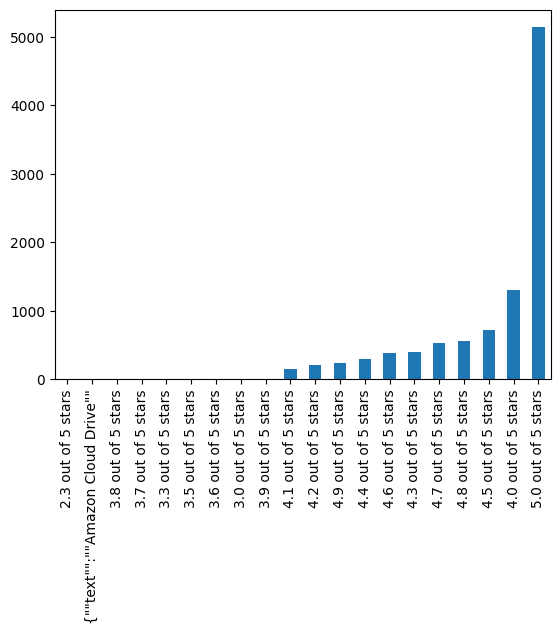

In [22]:
clean_data.average_review_rating.value_counts().sort_values().plot(kind='bar')

In [23]:
# create a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

# create a list of custom stopwords
new_words =  ['out', 'of ','5', 'stars']
stop_words = stop_words.union(new_words)

stop_words

{'5',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'of ',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [24]:
clean_data['average_review_rating'] = clean_data['average_review_rating'].astype('string')

In [25]:
clean_data['average_review_rating'] = clean_data['average_review_rating'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

clean_data.head(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.00,1.00,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.00,1.00,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.00,2.00,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.00,2.00,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.00,2.00,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [26]:
clean_data['average_review_rating']

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9997     5.0
9998     4.0
9999     5.0
10000    5.0
10001    4.5
Name: average_review_rating, Length: 9983, dtype: object

In [27]:
# remove rows using the drop() function
clean_data.drop(clean_data.index[clean_data['average_review_rating'] == '{""text"":""Amazon Cloud Drive""'],inplace=True)
# display the dataframe
clean_data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.00,1.00,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.00,1.00,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.00,2.00,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.00,2.00,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.00,2.00,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.00,5.0,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9998,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.00,4.0,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9999,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.00,5.0,Novelty & Special Use > Nove

In [28]:
clean_data.average_review_rating.unique()

array(['4.9', '4.5', '3.9', '5.0', '4.7', '4.3', '4.8', '4.0', '4.2',
       '4.6', '4.1', '4.4', '3.5', '3.0', '3.3', '3.7', '3.8', '3.6',
       '2.3'], dtype=object)

In [29]:
clean_data['average_review_rating'] = clean_data['average_review_rating'].astype(float)

###4.2.2) Price Feature

Things done

1) , - ' ', euro symbol, price range removed

Replaced currency symbol and comma

In [30]:
clean_data['price'] = clean_data['price'].str.replace(',', '')
clean_data['price'] = clean_data['price'].str.replace('-', '')
clean_data['price'] = clean_data['price'].str.replace('', '')
clean_data['price'] = clean_data['price'].str.replace('£', '')
clean_data['price']

0         3.42
1        16.99
2         9.99
3        39.99
4        32.19
         ...  
9997     22.95
9998     39.99
9999     43.99
10000    49.81
10001    21.20
Name: price, Length: 9982, dtype: object

In [31]:
clean_data= clean_data[clean_data['price'] != '6.99  10.49']
clean_data= clean_data[clean_data['price'] != '22.39  41.23']
clean_data= clean_data[clean_data['price'] != '25.34  56.44']
clean_data= clean_data[clean_data['price'] !='39.94  76.46']
clean_data= clean_data[clean_data['price'] != '269.00  699.99']
clean_data= clean_data[clean_data['price'] != '{']
clean_data= clean_data[clean_data['price'] != 'subtext']
clean_data= clean_data[clean_data['price'] != ':']
clean_data= clean_data[clean_data['price'] !='A great selection of apps and games']

###4.2.3)Coverting category into Main Category and sub category

Things Done 

1) Category is converted in main category and 3 sub category

In [32]:
df = clean_data[['amazon_category_and_sub_category']]
df

,amazon_category_and_sub_category
0,Hobbies > Model Trains & Railway Sets > Rail V...
1,Hobbies > Model Trains & Railway Sets > Rail V...
2,Hobbies > Model Trains & Railway Sets > Rail V...
3,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hobbies > Model Trains & Railway Sets > Rail V...
...,...
9997,Hobbies > Collectible Figures & Memorabilia > ...
9998,Characters & Brands > Star Wars > Toys
9999,Novelty & Special Use > Novelty > Accessories ...
10000,Hobbies > Collectible Figures & Memorabilia > ...


Previously category was combined(Before Cleaning)

In [33]:
df['amazon_category_and_sub_category'].head(1)

0    Hobbies > Model Trains & Railway Sets > Rail V...
Name: amazon_category_and_sub_category, dtype: object

In [34]:
df3= clean_data.join(df['amazon_category_and_sub_category'].str.split('>', expand=True)
.rename(columns={0:'Main_Category', 1:'Sub_Cat_1', 2:'Sub_Cat_2', 3:'Sub_Cat_3',4:'Sub_Cat_4'}))

Data After Seperating categories and subcategories

In [35]:
df3[['amazon_category_and_sub_category','Main_Category','Sub_Cat_1','Sub_Cat_2','Sub_Cat_3','Sub_Cat_4']]

,amazon_category_and_sub_category,Main_Category,Sub_Cat_1,Sub_Cat_2,Sub_Cat_3,Sub_Cat_4
0,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
1,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
2,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
3,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
4,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles,Trains,None
...,...,...,...,...,...,...
9997,Hobbies > Collectible Figures & Memorabilia > ...,Hobbies,Collectible Figures & Memorabilia,Collectible Props & Memorabilia,None,None
9998,Characters & Brands > Star Wars > Toys,Characters & Brands,Star Wars,Toys,None,None
9999,Novelty & Special Use > Novelty > Accessories ...,Novelty & Special Use,Novelty,Accessories,Buttons & Pins,None
10000,Hobbies > Collectible Figures & Memorabilia > ...,Hobbies,Collectible Figures & Memorabilia,Collectible Props & Memorabilia,None,None


###4.2.4) Manufracture Analysis

Things Done 

1) Manufracture and other string column coverted from object datatype to string datatype

2) From word cloud we can say that 'Disney' and 'Oxford Diecast' are popular manufracture

3) people are preferring purching the more products which are realted to 'Hobbies'

In [36]:
df3['manufacturer'] = df3['manufacturer'].astype('str')
df3['items_customers_buy_after_viewing_this_item'] = df3['items_customers_buy_after_viewing_this_item'].astype('str')
df3['customer_questions_and_answers'] = df3['customer_questions_and_answers'].astype('str')

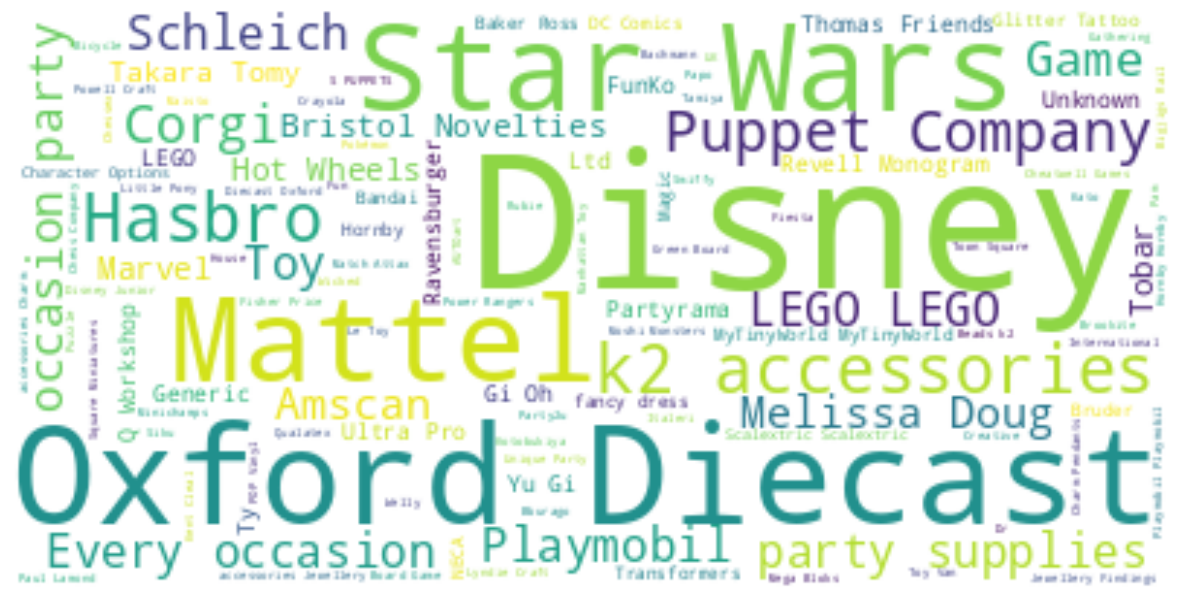

In [37]:
text = " ".join(i for i in df3.manufacturer)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: >

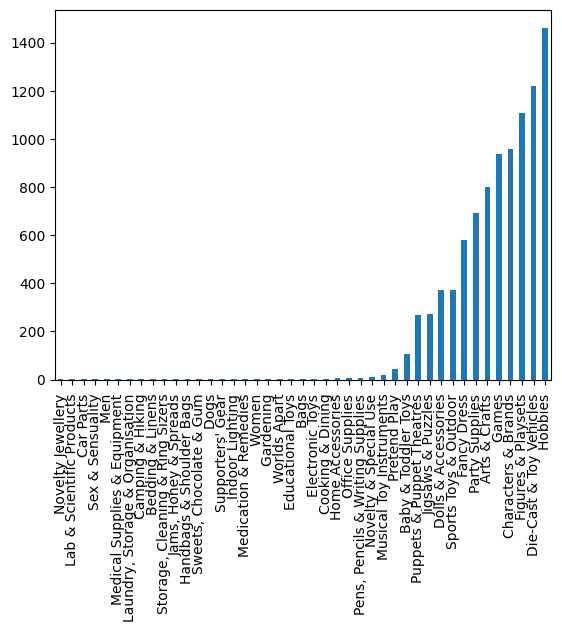

In [38]:
df3.Main_Category.value_counts().sort_values().plot(kind='bar')

##4.3) Data information after cleaning data

In [39]:
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} features.".format(df3.shape))

The dataset contains  9977 rows and  22 features.


In [40]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
average_review_rating,9977.00,4.71,0.37,2.30,4.50,5.00,5.00,5.00


In [41]:
df3['Main_Category'].unique()

array(['Hobbies ', 'Characters & Brands ', nan, 'Fancy Dress ', 'Bags ',
       'Arts & Crafts ', 'Handbags & Shoulder Bags ', 'Games ',
       'Figures & Playsets ', 'Home Accessories ',
       'Sweets, Chocolate & Gum ', 'Sports Toys & Outdoor ',
       'Die-Cast & Toy Vehicles ', 'Baby & Toddler Toys ',
       'Storage, Cleaning & Ring Sizers ', 'Bedding & Linens ',
       'Office Supplies ', 'Party Supplies ', 'Camping & Hiking ',
       'Pretend Play ', 'Women ', 'Electronic Toys ', 'Car Parts ',
       'Dolls & Accessories ', 'Indoor Lighting ', 'Educational Toys ',
       'Laundry, Storage & Organisation ', "Supporters' Gear ",
       'Jams, Honey & Spreads ', 'Novelty & Special Use ',
       'Musical Toy Instruments ', 'Men ', 'Sex & Sensuality ',
       'Cooking & Dining ', 'Medication & Remedies ',
       'Puppets & Puppet Theatres ', 'Jigsaws & Puzzles ', 'Dogs ',
       'Medical Supplies & Equipment ',
       'Pens, Pencils & Writing Supplies ', 'Worlds Apart ', 'Gardening 

#5) Data Preprocessing and feature understanding

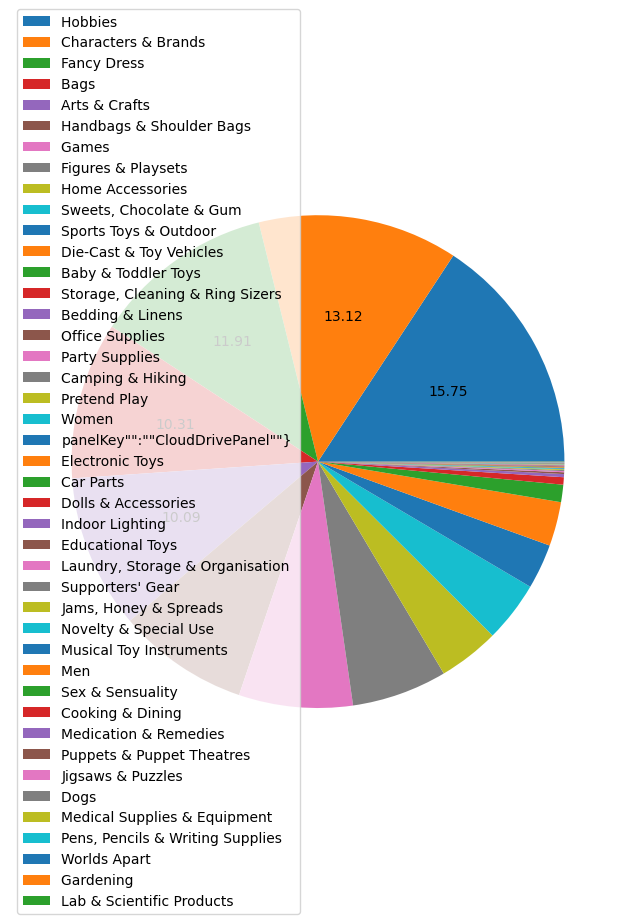

In [42]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

my_labels = ('Hobbies ', 'Characters & Brands ', 'Fancy Dress ', 'Bags ',
       'Arts & Crafts ', 'Handbags & Shoulder Bags ', 'Games ',
       'Figures & Playsets ', 'Home Accessories ',
       'Sweets, Chocolate & Gum ', 'Sports Toys & Outdoor ',
       'Die-Cast & Toy Vehicles ', 'Baby & Toddler Toys ',
       'Storage, Cleaning & Ring Sizers ', 'Bedding & Linens ',
       'Office Supplies ', 'Party Supplies ', 'Camping & Hiking ',
       'Pretend Play ', 'Women ', 'panelKey"":""CloudDrivePanel""}',
       'Electronic Toys ', 'Car Parts ', 'Dolls & Accessories ',
       'Indoor Lighting ', 'Educational Toys ',
       'Laundry, Storage & Organisation ', "Supporters' Gear ",
       'Jams, Honey & Spreads ', 'Novelty & Special Use ',
       'Musical Toy Instruments ', 'Men ', 'Sex & Sensuality ',
       'Cooking & Dining ', 'Medication & Remedies ',
       'Puppets & Puppet Theatres ', 'Jigsaws & Puzzles ', 'Dogs ',
       'Medical Supplies & Equipment ',
       'Pens, Pencils & Writing Supplies ', 'Worlds Apart ', 'Gardening ',
       'Lab & Scientific Products ', 'Novelty Jewellery ')

ax = df3['Main_Category'].value_counts().plot(kind='pie', figsize=(12,8), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=6, labels=my_labels)

#6) Fashion data category analysis

In [43]:
FDF= df3[df3["Main_Category"] == 'Fancy Dress ']

In [44]:
FDF['Sub_Cat_1'] = FDF['Sub_Cat_1'].replace(r"\s*\.*", "", regex = True)

In [45]:
FDF['Sub_Cat_1'].unique()

array(['Costumes', 'Accessories'], dtype=object)

<Axes: >

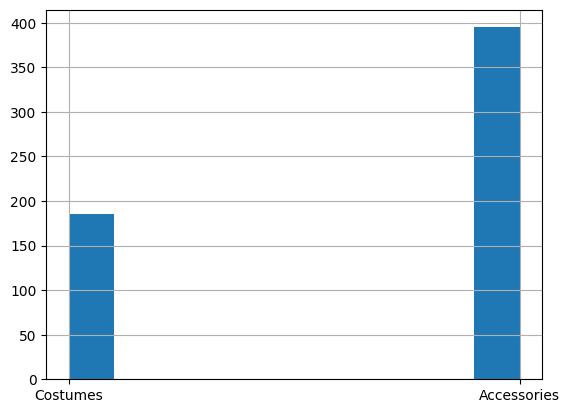

In [46]:
FDF['Sub_Cat_1'].hist()

<Axes: >

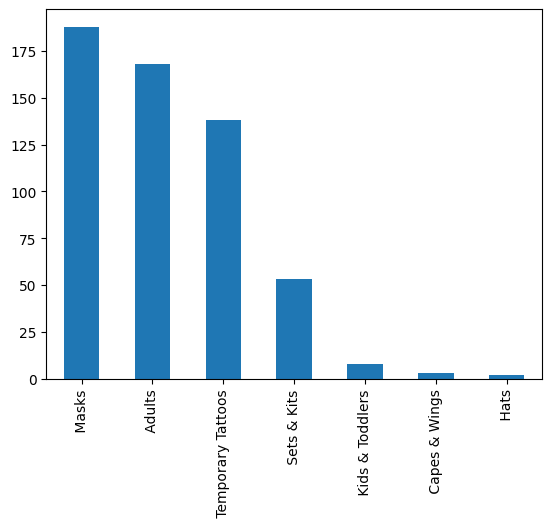

In [47]:
FDF['Sub_Cat_2'].value_counts().plot.bar()

In [48]:
len(FDF)

581

In [49]:
Fancy_dress = df3[df3['Main_Category']=='Fancy Dress ']['manufacturer'].unique()
Fancy_dress

array(['Yoo Hoo', 'Bristol Novelties', 'NECA', 'Henbrandt', 'Rubies',
       'WIDMANN', 'Impressions', 'Pams', 'Fun Shack', 'Wicked',
       'Wicked Costumes', 'Parties Unwrapped', 'Fireman Sam', 'Sancto',
       'California Costume', 'Rubber Johnnies TM', 'maboobie', 'Tobar',
       'Aqua Beads', 'AirSuits', 'Stretchy Suits', 'ILOVEFANCYDRESS',
       'Emmas Wardrobe', "Smiffy's", 'Red Star', 'GIZZY', 'MCS',
       'Morphsuits', 'Green', 'Tinsley Transfers', 'Disguise',
       'Mega Fancy Dress', 'Rasta Imposta', 'Widman',
       'CRAZYLADIES COSTUMES', 'Fancy Dress Accessories', 'King Horse',
       'AKORD', 'Glitter Tattoo Stencils', 'StacheTATS',
       'Fun And Glitter', 'Glitter Tattoo Powder', 'Bargained-Tatz',
       'IPT Imports', 'Amatola-Kei', 'Stickers', 'WorldWide',
       'Glitter Tattoo Starter Kits', 'Misha', 'GGSELL', 'Gb Posters',
       'Body Glue- Adhesive', 'Party Bags 2 Go', 'Dazzle Glitter Tattoos',
       'Generic', 'KARIZMA', 'Home Fusion Company', 'YiMei', 'In

In [50]:
F1= df3[df3['Main_Category']=='Fancy Dress ']

In [51]:
F1.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,...,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,Main_Category,Sub_Cat_1,Sub_Cat_2,Sub_Cat_3,Sub_Cat_4
282,3c0977ee85bc7f67d0d285a4005e5080,Yoohoo 5-inch Balloon Plush (Pink),Yoo Hoo,6.99,4 new,1.00,1.00,5.00,Fancy Dress > Costumes,http://www.amazon.co.uk/Yoohoo-Mini-8cm-Plush-...,...,Product Description Yoohoo & Friends are adora...,http://www.amazon.co.uk/Aurora-12017E-Yoohoo-F...,nan,We love this Yoohoo! // 5.0 // 18 Feb. 2016 //...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Fancy Dress,Costumes,None,None,None
488,0d84de04bd165f751acebd63fd139025,Dice Bomb Explosion Magic Trick Joke Novelty Gift,Bristol Novelties,4.84,9 new,1.00,1.00,4.00,Fancy Dress > Costumes,http://www.amazon.co.uk/LINKING-COINS-SPINNING...,...,Dice Smash (Explosion) costume Kids Fancy Dress,http://www.amazon.co.uk/Coin-Bottle-Folding-Ma...,nan,Enjoyed showing trick to all his friends // 4....,"{""seller""=>[{""Seller_name_1""=>""Character Fancy...",Fancy Dress,Costumes,None,None,None
1174,586ba192c57f4a55eb0d98ce4728d1c2,PREDATORS Series III Classic Predator 18cm,NECA,NaN,1 new,9,1,4.80,Fancy Dress > Accessories,http://www.amazon.co.uk/PREDATORS-Series-Elder...,...,One of sciencefictons greatest alien races the...,http://www.amazon.co.uk/Predators-Damaged-Clas...,nan,The DEFINITIVE Predator Figure! // 5.0 // 11 S...,"{""seller""=>{""Seller_name_1""=>""Sam Store US"", ""...",Fancy Dress,Accessories,None,None,None
1795,6dc657ef3eadcc365f31c6699cb148d3,Henbrandt Mens Womens Mobile Phone Fancy Dress...,Henbrandt,10.99,NaN,1,NaN,4.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Henbrandt-Mobile-Phone...,...,NaN,http://www.amazon.co.uk/Henbrandt-Mobile-Phone...,nan,good product. // 4.0 // 27 Dec. 2015 // By\n ...,"{""seller""=>{""Seller_name_1""=>""Mega Fancy Dress...",Fancy Dress,Accessories,Sets & Kits,None,None
1796,5daeb8fe5cbb5cfc02a844fcb6243095,Marvel Avengers Iron Man fancy dress 7-8yrs Pa...,Rubies,25.95,3 new,1,NaN,5.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Marvel-Avengers-Ultron...,...,AVENGERS Assemble! Now your young superhero ca...,http://www.amazon.co.uk/Marvel-Avengers-Age-Ul...,nan,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Cindy's Little ...",Fancy Dress,Accessories,Sets & Kits,None,None


In [52]:
F1.manufacturer.value_counts()

Bristol Novelties          49
Wicked                     20
Glitter Tattoo Stencils    17
Smiffy's                   17
Pams                       13
                           ..
FDC                         1
Merlins Medieval Closet     1
Morph Costumes              1
Immoral Clothing            1
Drumond Park                1
Name: manufacturer, Length: 250, dtype: int64

In [53]:
F1['average_review_rating'] = F1['average_review_rating'].astype(float)

In [54]:
F1.loc[(F1['average_review_rating'] >= 0.0) & (F1['average_review_rating'] <= 4.0)]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,...,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,Main_Category,Sub_Cat_1,Sub_Cat_2,Sub_Cat_3,Sub_Cat_4
488,0d84de04bd165f751acebd63fd139025,Dice Bomb Explosion Magic Trick Joke Novelty Gift,Bristol Novelties,4.84,9 new,1.00,1.00,4.00,Fancy Dress > Costumes,http://www.amazon.co.uk/LINKING-COINS-SPINNING...,...,Dice Smash (Explosion) costume Kids Fancy Dress,http://www.amazon.co.uk/Coin-Bottle-Folding-Ma...,nan,Enjoyed showing trick to all his friends // 4....,"{""seller""=>[{""Seller_name_1""=>""Character Fancy...",Fancy Dress,Costumes,None,None,None
1795,6dc657ef3eadcc365f31c6699cb148d3,Henbrandt Mens Womens Mobile Phone Fancy Dress...,Henbrandt,10.99,NaN,1,NaN,4.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Henbrandt-Mobile-Phone...,...,NaN,http://www.amazon.co.uk/Henbrandt-Mobile-Phone...,nan,good product. // 4.0 // 27 Dec. 2015 // By\n ...,"{""seller""=>{""Seller_name_1""=>""Mega Fancy Dress...",Fancy Dress,Accessories,Sets & Kits,None,None
1799,ccd52f97357ef144d02913284c6523f0,Ladies Zombie Bride Halloween Fancy Dress Cost...,Impressions,18.99,3 new,5,NaN,4.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Stained-Stockings-Hall...,...,Size Name:Women: 8-10 Perfect for Halloween ev...,nan,nan,Four Stars // 4.0 // 27 Nov. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""ICONIC FASHION""...",Fancy Dress,Accessories,Sets & Kits,None,None
1813,f8527e3c28f1c46f31fafbcf66d29c13,Ladies Small Sea Siren Mermaid Fancy Dress Cos...,California Costume,25.99,NaN,1,3,4.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Mermaid-Adult-Fancy-Co...,...,Size Name:S She is a shining star of the sea. ...,http://www.amazon.co.uk/Mermaid-Adult-Fancy-Dr...,nan,the dress is lovely but the sizing is incorrec...,"{""seller""=>{""Seller_name_1""=>""Alterego Fancy D...",Fancy Dress,Accessories,Sets & Kits,None,None
1821,1c32072c1d92a5ebe7e60bfa1e17b4f5,Aquabeads Hello Kitty Jewel Fun Pack,Aqua Beads,4.85,4 new,1,1,4.00,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Aquabeads-Hello-Kitty-...,...,Product Description Use the jewel and solid be...,http://www.amazon.co.uk/Aqua-Beads-79108-Aquab...,nan,Four Stars // 4.0 // 25 July 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Fancy Dress,Accessories,Sets & Kits,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,667ed1fb865387d906d07e7dfb48cfed,BLACK FISHNET STOCKINGS with LACE TOPS,Unknown,1.50,2 new,8.00,1.00,4.00,Fancy Dress > Accessories > Masks,http://www.amazon.co.uk/Funny-Rock-Guy-Adult-C...,...,Sexy black fishnets with lace tops,http://www.amazon.co.uk/Funny-Rock-Guy-Adult-C...,nan,they were good quality material but I couldn't...,"{""seller""=>[{""Seller_name_1""=>""Best Fancy Dres...",Fancy Dress,Accessories,Masks,None,None
3962,d38af6ef4d235a2f3ca04428b0a58598,Doctor Who - Empty Child - Card Face Mask,Dr Who,2.99,4 new,2.00,1.00,4.00,Fancy Dress > Accessories > Masks,http://www.amazon.co.uk/Mask-Pack-Empty-Child-...,...,High Quality Card Face Mask You & your friends...,nan,nan,and item looks great! Going to have fun with t...,"{""seller""=>[{""Seller_name_1""=>""Party-People"", ...",Fancy Dress,Accessories,Masks,None,None
4088,98e1aff9e663c3af9da2e2c90b3ddeb9,Idena 8210418 Toy Knight Dressing Up Kit for C...,Idena,15.94,5 new,1.00,1.00,4.00,Fancy Dress > Accessories,http://www.amazon.co.uk/Knight-Costume-Childre...,...,Product Description Medieval Armour Set with h...,nan,nan,Four Stars // 4.0 // 3 Feb. 2015 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Fancy Dress,Accessories,None,None,None
4293,e7c713fa804735417ef277a2050c0711,Revel

In [55]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 282 to 9443
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      581 non-null    object 
 1   product_name                                 581 non-null    object 
 2   manufacturer                                 581 non-null    object 
 3   price                                        538 non-null    object 
 4   number_available_in_stock                    332 non-null    object 
 5   number_of_reviews                            581 non-null    object 
 6   number_of_answered_questions                 522 non-null    object 
 7   average_review_rating                        581 non-null    float64
 8   amazon_category_and_sub_category             581 non-null    object 
 9   customers_who_bought_this_item_also_bought   539 non-null    object 
 10 

In [56]:
df3["positivity"] = df3["average_review_rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

In [57]:
df3['average_review_rating'] = df3['average_review_rating'].astype(float)

In [58]:
res = df3['Main_Category'].values == 'Fancy Dress '
len(res)

9977

In [59]:
df3['Main_Category'] = df3['Main_Category'].astype('|S')

##6.1) Preprocess Review text

In [60]:
F1["customer_reviews"] = F1["customer_reviews"].astype('string')

In [61]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = F1["manufacturer"].apply(lambda x: x.lower()).unique().tolist()
#keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'love reading book'

In [62]:
# 1.2 Apply preprocess function to the dataframe
F1["customer_reviews"] = F1["customer_reviews"].astype("str")
F1["clean_text"] = F1["customer_reviews"].apply(clean_text)

In [63]:
df3["customer_reviews"] = df3["customer_reviews"].astype("str")
df3["clean_text"] = df3["customer_reviews"].apply(clean_text)

In [64]:
df3["clean_text"]

0        worth buying picture alone ever  40  6 april 2...
1        four star  40  18 dec 2015  kenneth bell 18 de...
2        highly recommended  50  26 may 2015  simonb  2...
3        love  50  22 july 2013  lilla lukacs 22 july 2...
4        birthday present  50  14 april 2014  love dog ...
                               ...                        
9997     realistic  50  31 mar 2014  ray 31 mar 2014  t...
9998      see grandson u going fun  40  9 dec 2014  jan...
9999     five star  50  18 dec 2015  amazon customer 18...
10000    best sculpt  50  13 may 2010  sodam yat 13 may...
10001    gold leader  50  31 aug 2015  graham mccoid 31...
Name: clean_text, Length: 9977, dtype: object

In [65]:
F1["clean_text"]

282     love yoohoo  50  18 feb 2016  londonmum 18 feb...
488     enjoyed showing trick friend  40  19 mar 2016 ...
1174    definitive predator figure  50  11 sept 2011  ...
1795    good product  40  27 dec 2015  amazon customer...
1796    five star  50  2 dec 2015  amazon customer 2 d...
                              ...                        
8266    great trekkies   50  23 july 2013  mr maureen ...
8824    look good   50  4 mar 2014  velma 4 mar 2014  ...
9072    awesome  50  9 jan 2016  mr gm kerman 9 jan 20...
9131    five star  50  15 jun 2015  amazon customer 15...
9443    laugh fun board game year  50  3 may 2012  p m...
Name: clean_text, Length: 581, dtype: object

In [66]:
F1["clean_text"].head().values

array(['love yoohoo  50  18 feb 2016  londonmum 18 feb 2016  kid love yoohoos one super cute',
       'enjoyed showing trick friend  40  19 mar 2016  catwoman 19 mar 2016  intrigued 7 year old enjoyed showing trick friend easy use',
       "definitive predator figure  50  11 sept 2011  mccaffrey top 1000 reviewer 11 sept 2011  predator 2010 movie series 3 action figure classic predator maskedi knew would worth waiting fornecas classic predator appeared 1987 original perfectfirst even though figure amazing felt little bit difficult splash fifth 'classic' predator necas released last year soseries 1unmasked series 2battle damaged alien v predator 2 pack closed mouth year sdcc gort predatorbut version far favouritethe paint job best yet cleaner le sloppiness screen accurate coloursit also great head sculpt mask bone trophy's wear make look even different previous version screen accurate based first film also includes retractable wrist blade shoulder mounted cannonif predator figure would 

In [67]:
 #Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love Pace university. I love Pace campus.")

{'I': 2, 'love': 2, 'Pace': 2, 'university.': 1, 'campus.': 1}

In [68]:
F1['manufacturer'].value_counts()

Bristol Novelties          49
Wicked                     20
Glitter Tattoo Stencils    17
Smiffy's                   17
Pams                       13
                           ..
FDC                         1
Merlins Medieval Closet     1
Morph Costumes              1
Immoral Clothing            1
Drumond Park                1
Name: manufacturer, Length: 250, dtype: int64

In [69]:
BN = df3[df3["manufacturer"]=="Bristol Novelties"]
Wicked = df3[df3["manufacturer"]=="Wicked"]
GTS = df3[df3["manufacturer"]=="Glitter Tattoo Stencils"]


##6.2) Define a function to create a wordcloud from dictionary of word frequency

In [70]:
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

##6.3) Defining positive criteria (if rating is greater than 4 then considering positive else negative)

In [71]:
BN['Positive']= BN["average_review_rating"].apply(lambda x: 1 if x>4 else(0 if x<=4 else -1))
Wicked['Positive']= Wicked["average_review_rating"].apply(lambda x: 1 if x>4 else(0 if x<=4 else -1))
GTS['Positive']= GTS["average_review_rating"].apply(lambda x: 1 if x>4 else(0 if x<=4 else -1))

In [72]:
BN.groupby(["manufacturer","Positive"])["Positive"].count()

manufacturer       Positive
Bristol Novelties  0            9
                   1           44
Name: Positive, dtype: int64

In [73]:
Wicked.groupby(["manufacturer","Positive"])["Positive"].count()

manufacturer  Positive
Wicked        0            4
              1           17
Name: Positive, dtype: int64

In [74]:
GTS.groupby(["manufacturer","Positive"])["Positive"].count()

manufacturer             Positive
Glitter Tattoo Stencils  0            4
                         1           13
Name: Positive, dtype: int64

###6.3.1) Brand BN analysis

In [75]:
len(BN[BN["Positive"]==1])

44

In [76]:
len(BN[BN["Positive"]==0])

9

In [77]:
df3.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'Main_Category', 'Sub_Cat_1', 'Sub_Cat_2', 'Sub_Cat_3', 'Sub_Cat_4',
       'positivity', 'clean_text'],
      dtype='object')

In [78]:
BN.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'Main_Category', 'Sub_Cat_1', 'Sub_Cat_2', 'Sub_Cat_3', 'Sub_Cat_4',
       'positivity', 'clean_text', 'Positive'],
      dtype='object')

In [79]:
BN["clean_text"]

488     enjoyed showing trick friend  40  19 mar 2016 ...
1750    surprisingly effective  40  26 dec 2014  fores...
1810    survive night party test  50  29 jan 2015  fio...
1812    good fit brilliant quick delivery  50  13 feb ...
1816    nice dress  40  16 nov 2011  danielle 16 nov 2...
1833    pleased outfit  50  27 sept 2015  rainy 27 sep...
1835    nice costume  50  2 mar 2015  dny 2 mar 2015  ...
2890    great prop  40  8 jan 2016  keith robinson 8 j...
3187    outrageously good value  50  8 dec 2012  shaun...
3188    viking party  50  11 jun 2015  jason 11 jun 20...
3200    four star  40  30 jun 2014  jacqui haynes 30 j...
3211    toy much shirt either  30  4 jan 2012  rogerdo...
3215    fab themed party  40  21 july 2011  jade r edm...
3222    70 medallion necklace  50  10 mar 2012  mazara...
3228    great  50  5 jan 2013  jsd 5 jan 2013  perfect...
3239    lovely costume  50  23 feb 2013  j watson 23 f...
3240     50  24 mar 2015  miller 24 mar 2015  agreat q...
3255    exceed

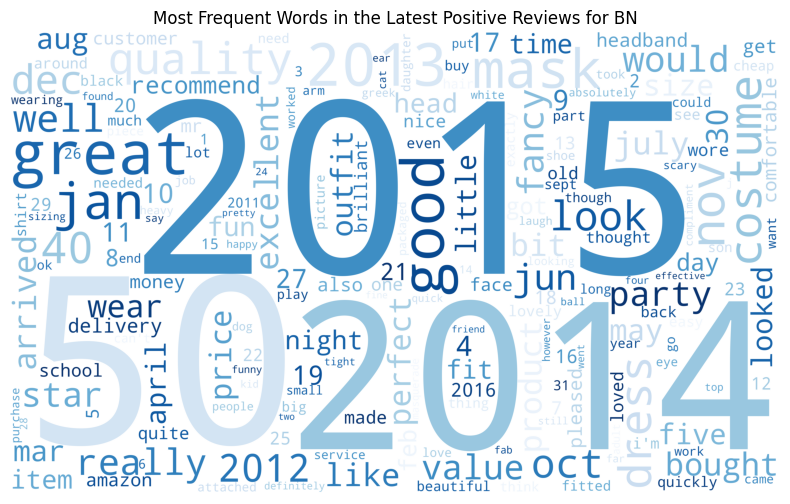

In [80]:

BN_pos = " ".join(BN[BN["Positive"]==1]["clean_text"][0:53])
BN_pos_word_freq = word_freq_dict(BN_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(BN_pos_word_freq, "Most Frequent Words in the Latest Positive Reviews for BN")

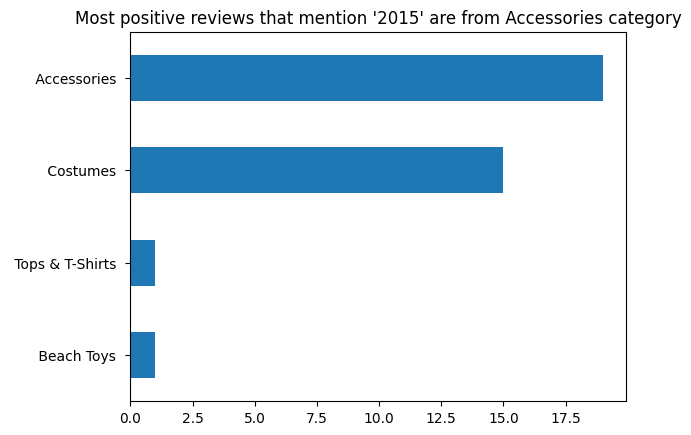

In [81]:
BN[BN["clean_text"].apply(lambda x: "2015" in x)]["Sub_Cat_1"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most positive reviews that mention '2015' are from Accessories category")
plt.show()

Insight - People are happy with the BN accessories products

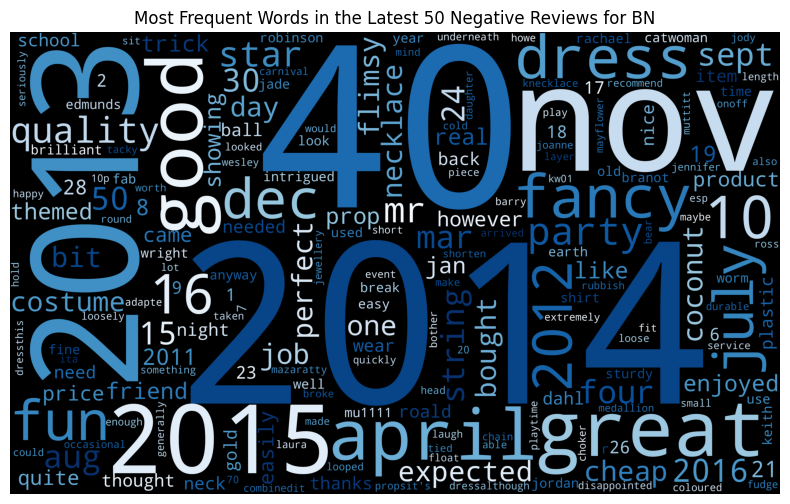

In [82]:
BN_neg = " ".join(BN[BN["Positive"]==0]["clean_text"][0:50])
BN_neg_word_freq = word_freq_dict(BN_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(BN_neg_word_freq, "Most Frequent Words in the Latest 50 Negative Reviews for BN")

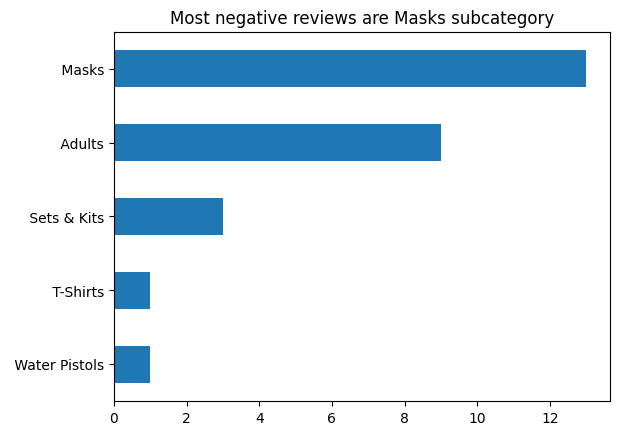

In [83]:
BN[BN["clean_text"].apply(lambda x: "2014" in x)]["Sub_Cat_2"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most negative reviews are Masks subcategory")
plt.show()

Insight BN Mask products need more attention

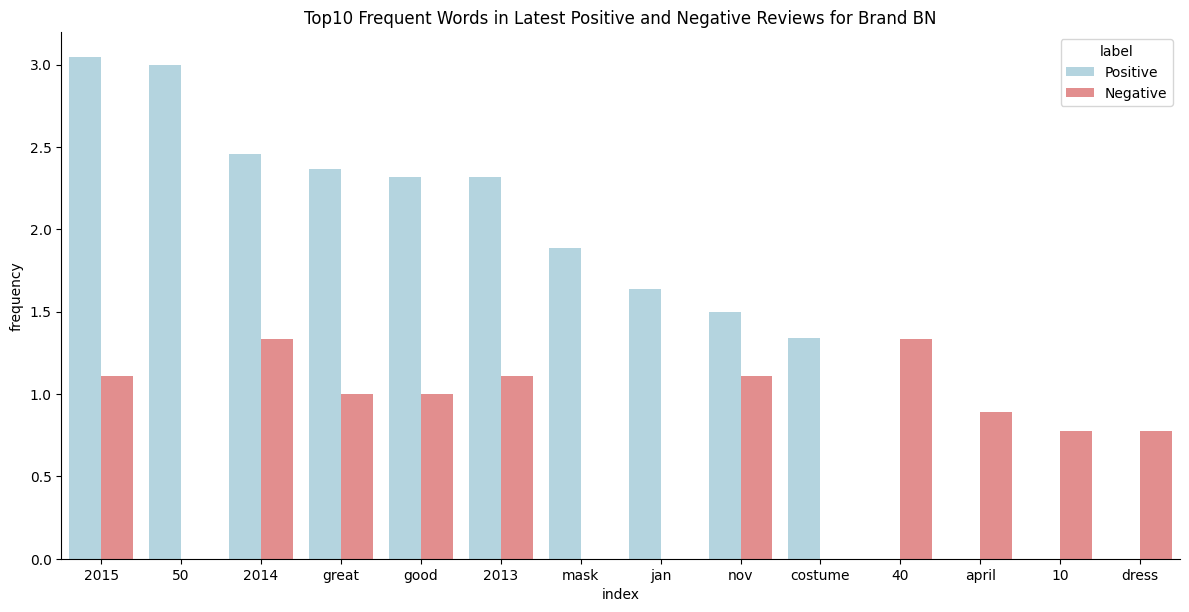

In [84]:
topn_wordfreq_bar_both(BN_pos_word_freq, BN_neg_word_freq, 
                       min(sum(BN["Positive"]==1), 100), 
                       min(sum(BN["Positive"]==0), 100), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Brand BN", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

###6.3.2) Wicked Brand ANalysis

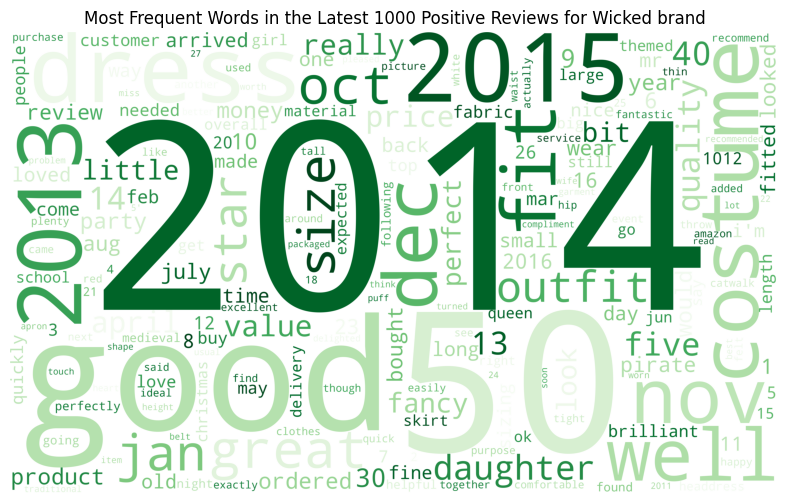

In [85]:
# 2.5 Plot wordclouds for latest 50 reviews for wicked
wicked_pos = " ".join(Wicked[Wicked["Positive"]==1]["clean_text"][0:50])
wicked_pos_word_freq = word_freq_dict(wicked_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(wicked_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Wicked brand")

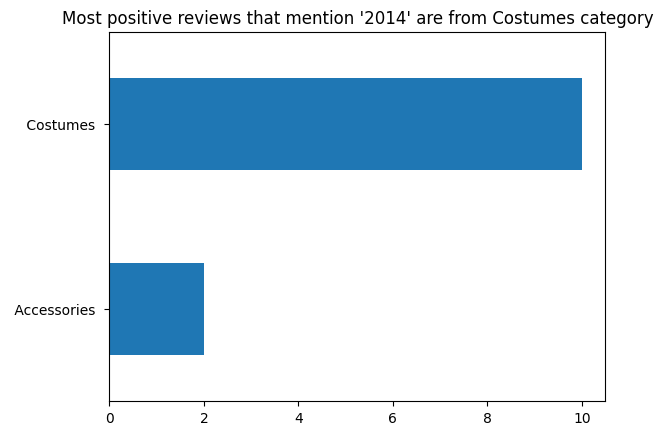

In [86]:
Wicked[Wicked["clean_text"].apply(lambda x: "2014" in x)]["Sub_Cat_1"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most positive reviews that mention '2014' are from Costumes category")
plt.show()

Insight - People are happy with Wicked brand Costume category

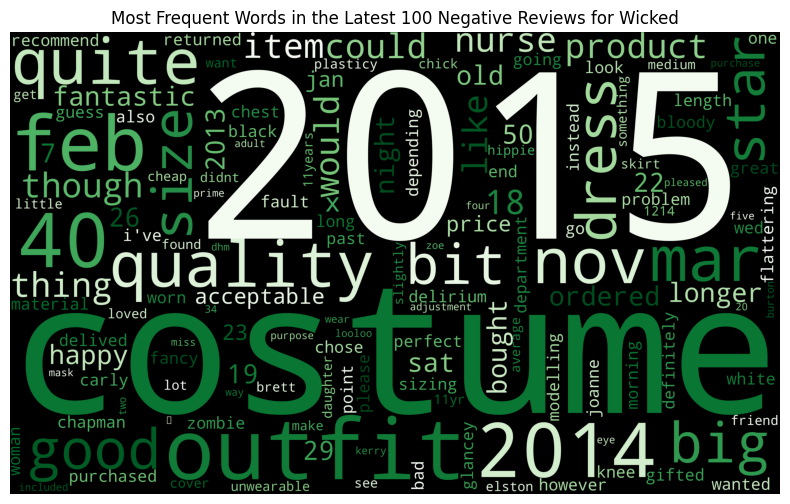

In [87]:
wicked_neg = " ".join(Wicked[Wicked["Positive"]==0]["clean_text"][0:30])
wicked_neg_word_freq = word_freq_dict(wicked_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(wicked_neg_word_freq, "Most Frequent Words in the Latest 100 Negative Reviews for Wicked")

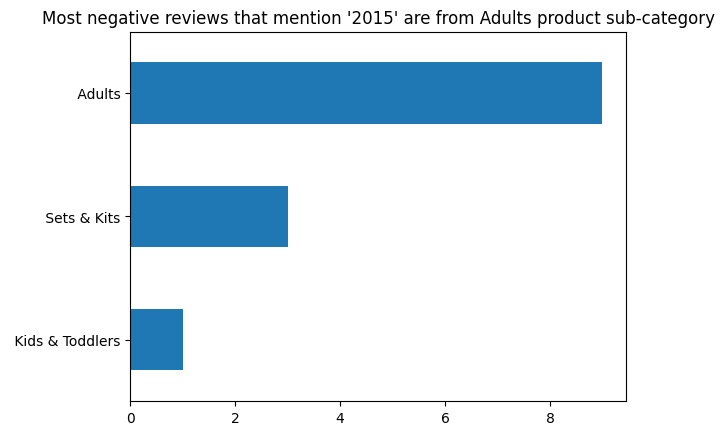

In [88]:
Wicked[Wicked["clean_text"].apply(lambda x: "2015" in x)]["Sub_Cat_2"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most negative reviews that mention '2015' are from Adults product sub-category")
plt.show()

Insight - Wicked brand need improvement in Adult products area

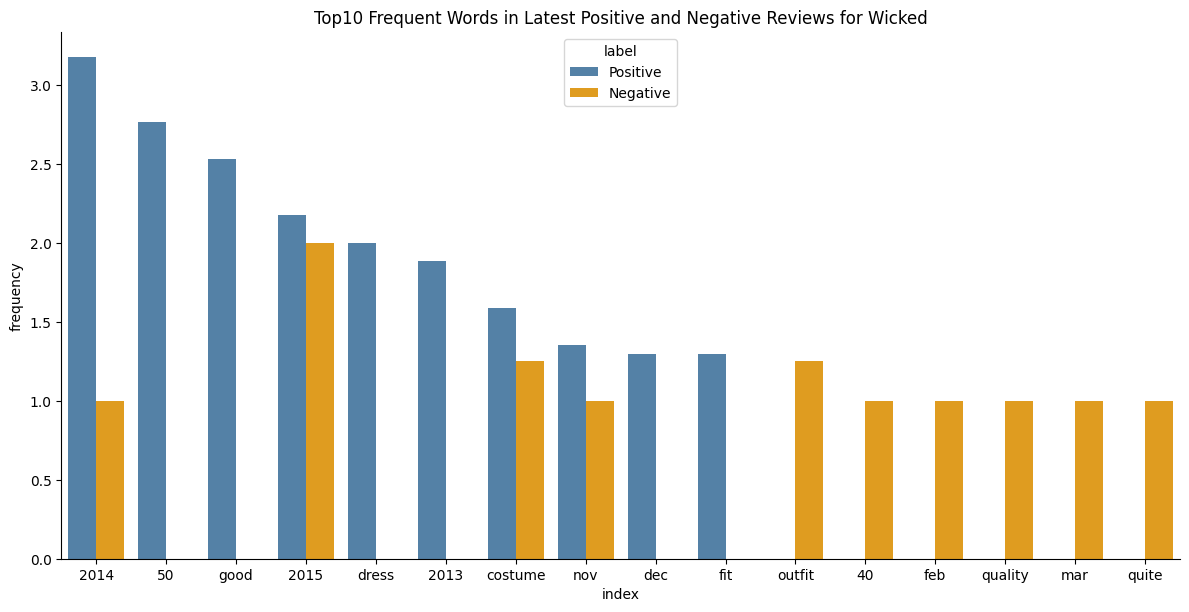

In [89]:
topn_wordfreq_bar_both(wicked_pos_word_freq, wicked_neg_word_freq, 
                       min(sum(Wicked["Positive"]==1), 1000), 
                       min(sum(Wicked["Positive"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Wicked", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)

###6.3.3) GTS brand Analysis

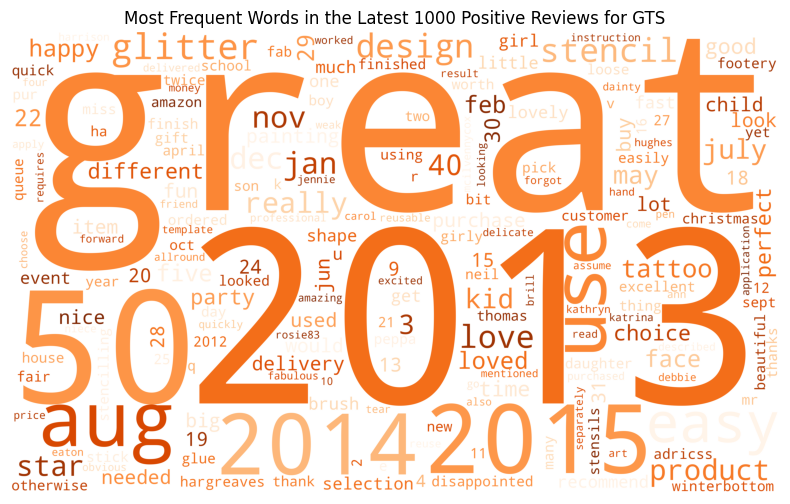

In [90]:
# 2.6 Plot wordclouds for latest 1000 reviews for GTS
GTS_pos = " ".join(GTS[GTS["Positive"]==1]["clean_text"][0:1000])
GTS_pos_word_freq = word_freq_dict(GTS_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(GTS_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for GTS")

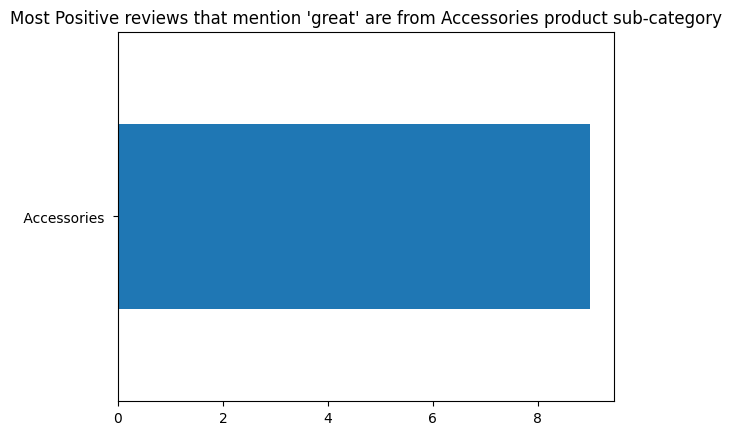

In [91]:
GTS[GTS["clean_text"].apply(lambda x: "great" in x)]["Sub_Cat_1"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most Positive reviews that mention 'great' are from Accessories product sub-category")
plt.show()

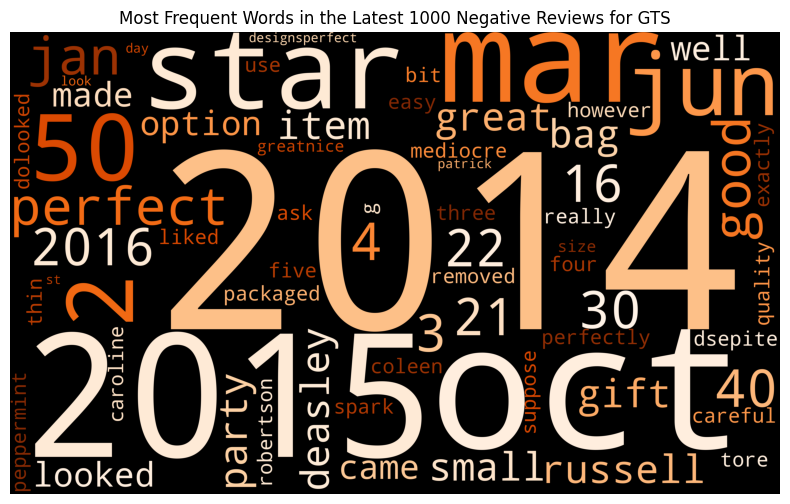

In [92]:
GTS_neg = " ".join(GTS[GTS["Positive"]==0]["clean_text"][0:30])
GTS_neg_word_freq = word_freq_dict(GTS_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(GTS_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for GTS")

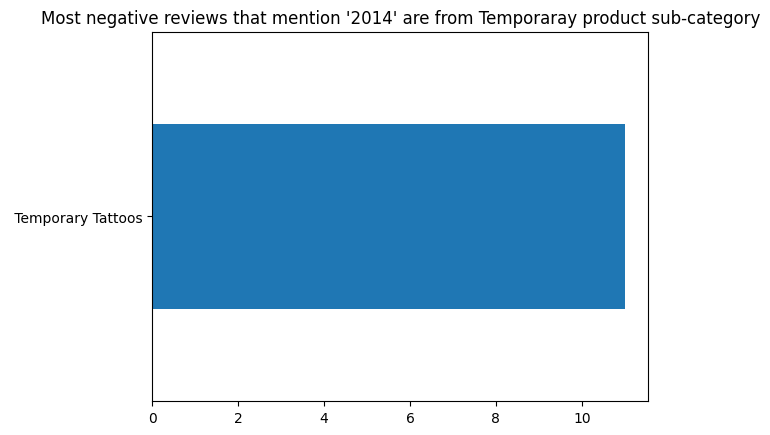

In [93]:
GTS[GTS["clean_text"].apply(lambda x: "2014" in x)]["Sub_Cat_2"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most negative reviews that mention '2014' are from Temporaray product sub-category")
plt.show()

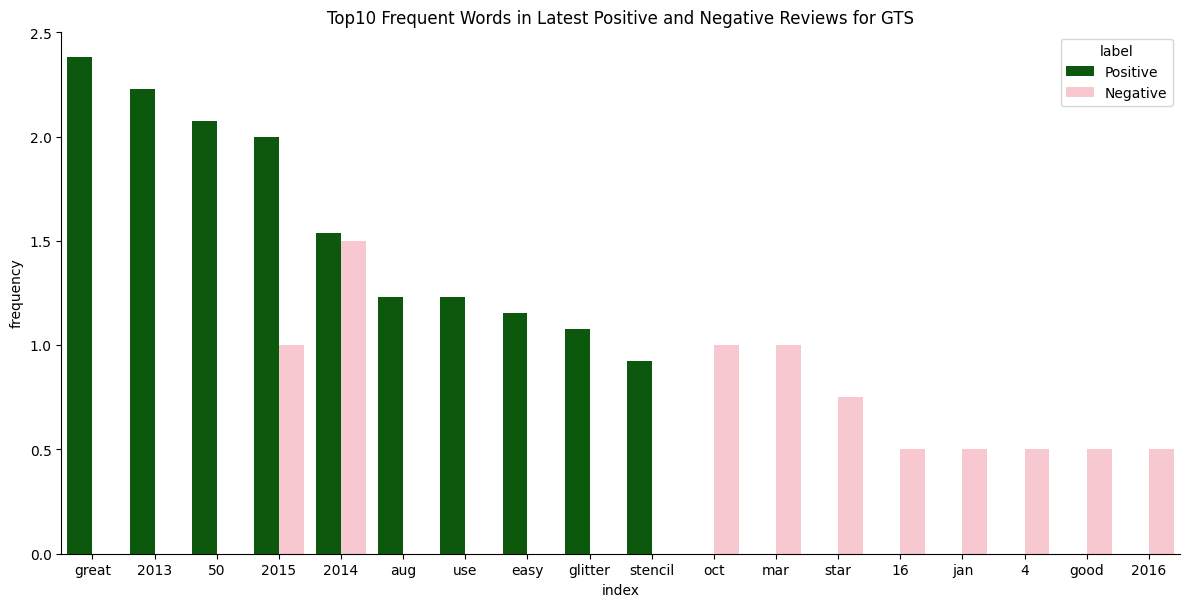

In [94]:
topn_wordfreq_bar_both(GTS_pos_word_freq, GTS_neg_word_freq, 
                       min(sum(GTS["Positive"]==1), 1000), 
                       min(sum(GTS["Positive"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for GTS", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

##6.4) Summary 

The visulisations above show that:
* The top sellers that amazon fashion buyers perferring are BN, Wicked and GTS. People are purchasing accessories and costume as main category
* Most accessory buyers are giving prefernce to brand BN for unique design wheras mask buyers are complain about low quality and loose fitting.
* Wicked brand buyers are in general positive about the overall quality and uniqueness of their costumes, but also complained about the adult produts subcategory. Some buyers also complained about quality of the products.
* GTS buyers show specific appreciation for the good price and design for accessories, and complained about the temporary tattoos design.

#7) Model Building

# Vectorization and Topic Modelling

Converting the original text into a document-term matrix (https://en.wikipedia.org/wiki/Document-term_matrix), where the feature names are words and the values are the scaled frequency of the words in each document, is necessary to extract features from each text.

"Scaled frequency": Why? Simply counting the number of times a word appears in a manuscript reveals that very frequent words begin to predominate, even if they might not actually have that much "informational" substance (such as "the"). As a result, we rescale the word frequency using the TF-IDF model.
* Term frequency: the number of times a term appears in a document.

* Inverse document frequency measures the rarity of a term across all documents.


##7.1) TF-IDF Vectorization and topic modelling

In [95]:
# Step 3: Vectorization and Topic Modelling
# 3.1 Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

In [96]:
# 3.2 Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [97]:
# 3.3 Define a function to print LDA topics
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

###7.1.1) LDA model for brand BN

In [98]:
# 3.4 Run LDA model for BN
t0 = time.time()
BN_tfidf = tfidf_vectorizer.fit_transform(BN["clean_text"])
BN_tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
lda.fit(BN_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for BN.".format(n_topics))
print_topn_words(lda, BN_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for BN.
Topic #0: 2015 2014 2013 50 mask great good jan dec nov
Topic #1: jan good 50 2013 2014 oct great 19 2015 excellent
Topic #2: use sept minute wanted need good funny perfect fancy liked
Topic #3: enjoyed friend 2016 mar 19 use old year easy 40
Topic #4: 27 2015 jun good 50 18 dec outfit nov great
Topic #5: 2015 april oct 10 need 27 ball nice costume 2016
Topic #6: finished estimated mr life fit 2016 delivered liked star bargain
Topic #7: long actually impressed 30 2012 head look 24 need dec
Topic #8: 2012 great 2013 jan fine costume dec aug real day
Topic #9: amazon bit pleased fitted far ok quite product look ended

Done in 0.352s.


###7.1.2) LDA model for brand Wicked

In [99]:
# Run the model for Wicked
t0 = time.time()
wicked_tfidf = tfidf_vectorizer.fit_transform(Wicked["clean_text"])
wicked_tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
lda.fit(wicked_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for wicked Brand.".format(n_topics))
print_topn_words(lda, wicked_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for wicked Brand.
Topic #0: 2016 10 people touch fitted mr joanne soon stretchy 11
Topic #1: length height money definitely brilliant delivery delivered job make inside
Topic #2: chose 23 like seller make underneath 2013 promptly actually joanne
Topic #3: dec miss 2015 23 little really outfit 13 big stretchy
Topic #4: loved arrived stretchy easily perfect product expected 30 hip intended
Topic #5: exactly 2013 best christmas tiny felt 19 review instead year
Topic #6: dress nice fit 12 jun quick height plenty 1012 come
Topic #7: 21 purchase mr good overall 23 worn job loved wife
Topic #8: 2015 2014 50 nov good dec star 2013 26 dress
Topic #9: ideal expected outfit recommend party inch 21 christmas 20 event

Done in 0.156s.


###7.1.3) LDA model for brand GTS

In [100]:
# Run the model for GTS
t0 = time.time()
GTS_tfidf = tfidf_vectorizer.fit_transform(GTS["clean_text"])
GTS_tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
lda.fit(GTS_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for GTS.".format(n_topics))
print_topn_words(lda, GTS_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for GTS.
Topic #0: stensils 2016 service kezza forward extra jennie 22 intriquet came
Topic #1: oct child delivered highly niece loved instruction 2014 peppermint dsepite
Topic #2: 28 aug tattoo 2013 creamer wizard amanda brilliant pack popular
Topic #3: nov 28 school 12 free house addition patrick qualifying bag
Topic #4: 2014 oct 2015 nov star 50 hargreaves neil dec loved
Topic #5: 2016 16 jun jan packaged looked ask mediocre came removed
Topic #6: 2013 jan great year christmas new really 19 selection 31
Topic #7: 2015 july 18 stencil 29 great 50 22 2014 nov
Topic #8: cost dec price came peppermint 2013 27 thanks footery fab
Topic #9: 2013 use easy great aug love look 21 feb mar

Done in 0.144s.


#8) Feature Importance for Sentiment Classification

The document-term matrix we obtain fter running text vectorization can be used as a feature set. In the following example, we use it as the features to predict 

##8.1) BN Brand

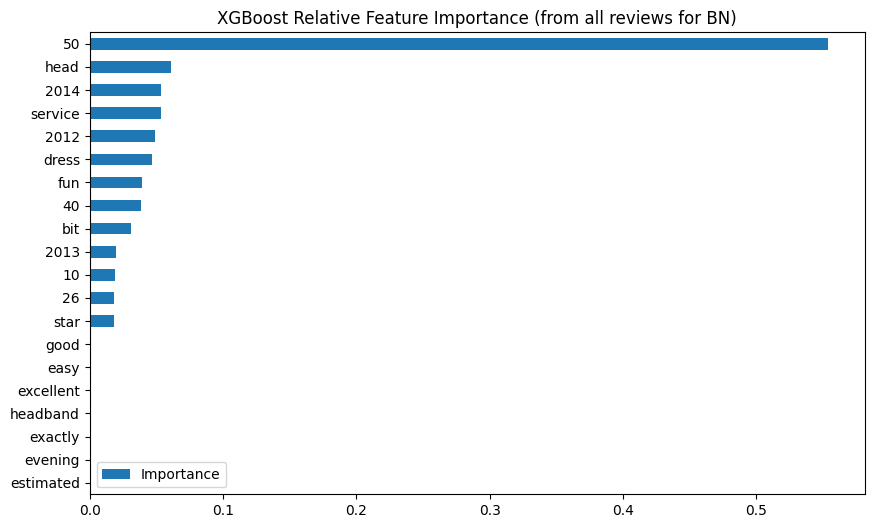

In [101]:
# Step 4: Plot feature importance using XGBoost
# 4.1 for BN
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(BN_tfidf, BN["Positive"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=BN_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for BN)")
plt.show()

##8.2) Wicked Brand

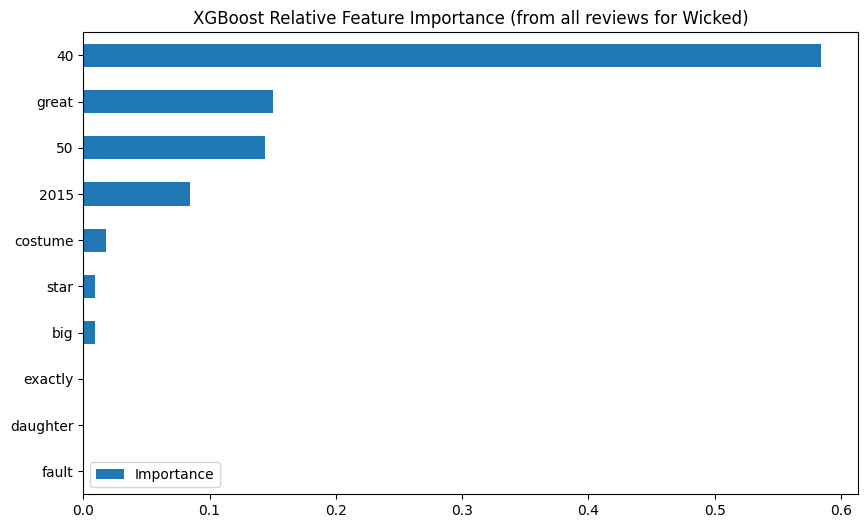

In [102]:
# Step 4: Plot feature importance using XGBoost
# 4.1 for Wicked
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(wicked_tfidf, Wicked["Positive"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=wicked_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(10).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for Wicked)")
plt.show()

#9) Sentiment Analysis using VADER

Lexical analysis and machine learning are the two most used methods for text sentiment analysis.

The "dictionary of sentiment" is pre-defined, and the lexcial technique maps fresh text to it. One illustration of such an approach is VADER. The sentiment score of a phrase according to the VADER is the normalized sum of the sentiment ratings of all the words in that sentence.

When a pre-labeled dataset is available, the machine learning approach is used to utilize it as a training dataset to predict the sentiment of a new text. Essentially, this is a prediction/classification issue.


In [103]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=08e549b53127b5212b623f7a8810ae763a01eaddeda61e13ee799f8dca57323f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [104]:
#Step 1: Filter English reviews
# 1.1 Add language labels (This part can take ~15 minutes)
from langdetect import detect

In [105]:
# Step 1: Filter English reviews
# 1.1 Add language labels (This part can take ~15 minutes)
# from langdetect import detect
def lang_detect(text):
    try:
        return detect(text)
    except:
        return None

In [106]:
import time
start_time = time.time()
F1["lang"] = F1["customer_reviews"].apply(lang_detect)
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

It takes 6.949898958206177 seconds for the code to finish.


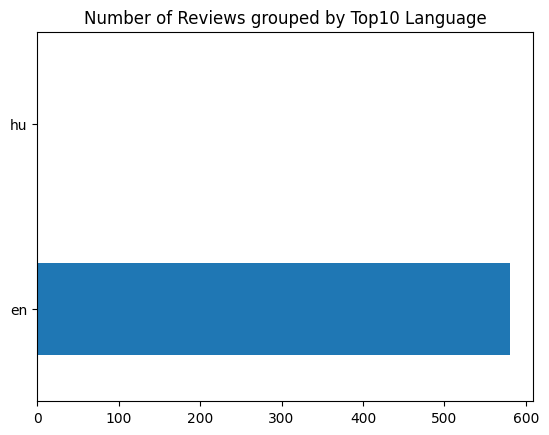

In [107]:
#1.2 Plot distribution of reviews into languages
F1["lang"].value_counts()[:10].plot(kind="barh", title="Number of Reviews grouped by Top10 Language")
plt.show()

In [108]:
# 1.3 Only take English reviews
reviews = F1[F1["lang"]=="en"]

In [109]:
# Step 2: Sentiment analysis using Vader
# 2.1 Load packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("The weather is nice today.")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [110]:
# 2.2 Create sentiment score columns (It takes roughly 5 minutes)
start_time = time.time()
reviews["customer_reviews"] = reviews["customer_reviews"].astype("str")
reviews["sent_neg"] = reviews["customer_reviews"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
reviews["sent_neu"] = reviews["customer_reviews"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
reviews["sent_pos"] = reviews["customer_reviews"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
reviews["sent_comp"] = reviews["customer_reviews"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

It takes 5.127634763717651 seconds for the code to finish.


In [111]:
# 2.3 Save the datasets into csv
reviews.to_csv("reviews_with_sentiment_scores.csv")

In [112]:
# After the steps above we will get a pre-proceessed dataset
reviews_en = pd.read_csv("/content/reviews_with_sentiment_scores.csv")

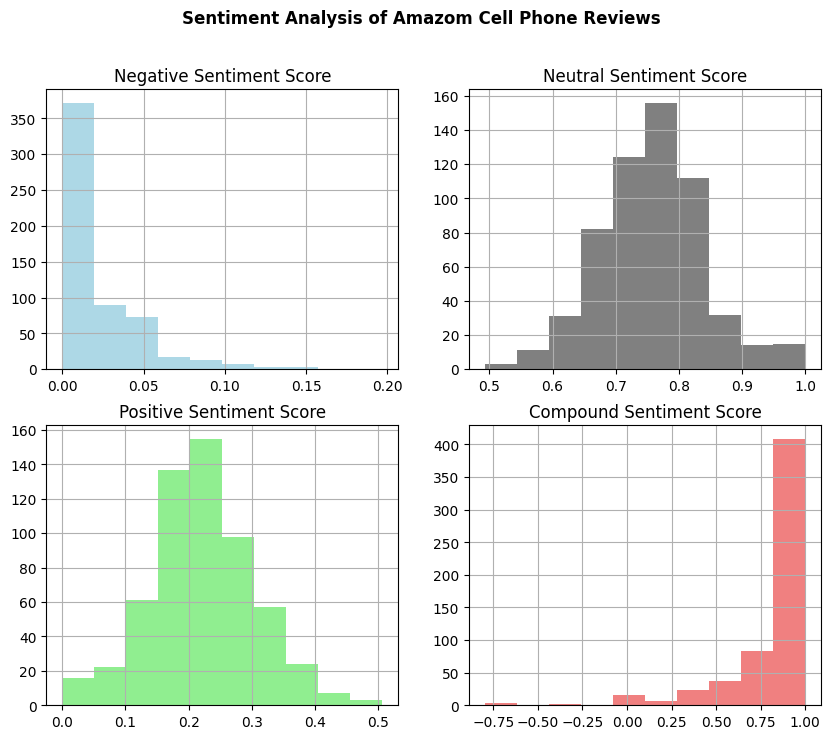

In [113]:
# 2.4 Plot the distribution of sentiment scores
plt.figure()

plt.subplot(2, 2, 1)
reviews_en["sent_neg"].hist(figsize=(10, 8), color="lightblue")
plt.title("Negative Sentiment Score")
plt.subplot(2, 2, 2)
reviews_en["sent_neu"].hist(figsize=(10, 8), color="grey")
plt.title("Neutral Sentiment Score")
plt.subplot(2, 2, 3)
reviews_en["sent_pos"].hist(figsize=(10, 8), color="lightgreen")
plt.title("Positive Sentiment Score")
plt.subplot(2, 2, 4)
reviews_en["sent_comp"].hist(figsize=(10, 8), color="lightcoral")
plt.title("Compound Sentiment Score")

plt.suptitle('Sentiment Analysis of Amazom Cell Phone Reviews', fontsize=12, fontweight='bold');

plt.show()

The charts show that the majority of the reviews are positive (i.e. compoung score > 0).

The correlation coefficient between sentiment score (compound) and rating is -0.0072 with a p-value of  0.8632.


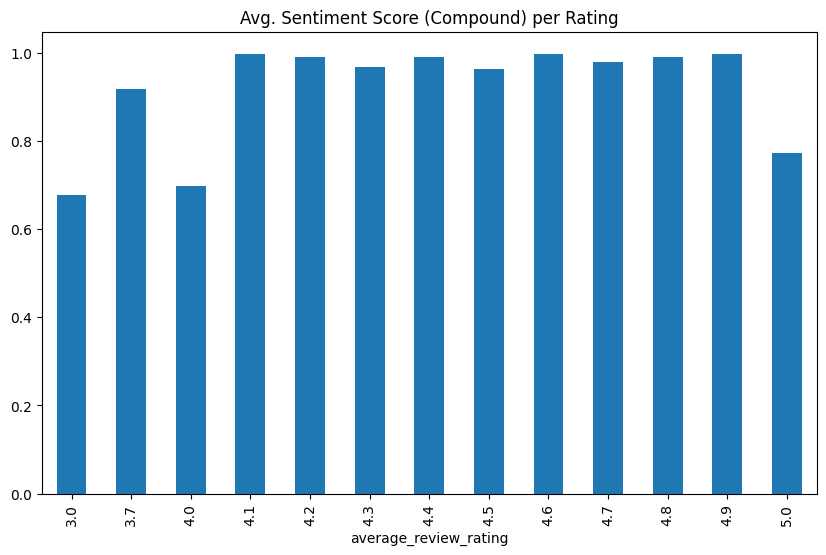

In [114]:
# 2.5 Check the correlation between sentiment score (compound) and rating
import numpy as np
import scipy.stats as stats
print("The correlation coefficient between sentiment score (compound) and rating is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(reviews_en["average_review_rating"], reviews_en["sent_comp"])))
reviews_en.groupby("average_review_rating").mean()["sent_comp"].plot(kind="bar", figsize=(10, 6))
plt.title("Avg. Sentiment Score (Compound) per Rating")
plt.show()

There is a strong correlation between the sentiment score derived by VADER and the actual rating from the reviewers. The VADER model proves to be a very powerful tool for sentiment classification.

# Appendix

Word frequency:
* https://programminghistorian.org/en/lessons/counting-frequencies

Sentiment anlaysis: 
* Python implementation of VADER: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
* VADER method explaind: http://datameetsmedia.com/vader-sentiment-analysis-explained/
* Documentation: https://github.com/cjhutto/vaderSentiment

Topic modelling: 
* TF-IDF model: https://machinelearningmastery.com/gentle-introduction-bag-words-model/
* Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

Sentiment classification:
* Feature extraction using TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
* Classification: https://towardsdatascience.com/latent-semantic-analysis-sentiment-classification-with-python-5f657346f6a3

#Thank You